In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 

In [10]:
telemetry_df  = pd.read_parquet('../data/raw/PdM_errors.parquet')

In [11]:
telemetry_df

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4
...,...,...,...
3914,2015-11-21 08:00:00,100,error2
3915,2015-12-04 02:00:00,100,error1
3916,2015-12-08 06:00:00,100,error2
3917,2015-12-08 06:00:00,100,error3


In [ ]:
## convert the datetime column to datetime type
telemetry_df['datetime'] = pd.to_datetime(telemetry_df['datetime'])


In [6]:
telemetry_df.shape

(876100, 6)

In [7]:
# show the unique values of the dataframe
telemetry_df.nunique()

datetime       8761
machineID       100
volt         876100
rotate       876100
pressure     876100
vibration    876100
dtype: int64

In [9]:
telemetry_df.describe()

,machineID,volt,rotate,pressure,vibration
count,876100.000000,876100.000000,876100.000000,876100.000000,876100.000000
mean,50.500000,170.777736,446.605119,100.858668,40.385007
std,28.866087,15.509114,52.673886,11.048679,5.370361
min,1.000000,97.333604,138.432075,51.237106,14.877054
25%,25.750000,160.304927,412.305714,93.498181,36.777299
50%,50.500000,170.607338,447.558150,100.425559,40.237247
75%,75.250000,181.004493,482.176600,107.555231,43.784938
max,100.000000,255.124717,695.020984,185.951998,76.791072


In [15]:
machine1_df = telemetry_df[telemetry_df['machineID']==1] 

<AxesSubplot:xlabel='datetime'>

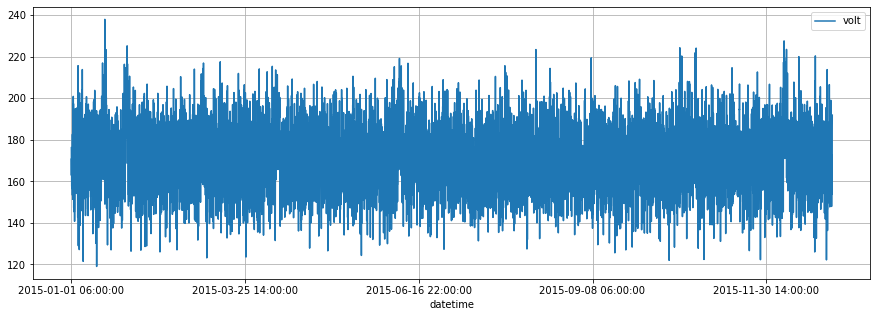

In [18]:
machine1_df.plot(x='datetime', y='volt', figsize=(15,5), grid=True)   

<AxesSubplot:xlabel='datetime'>

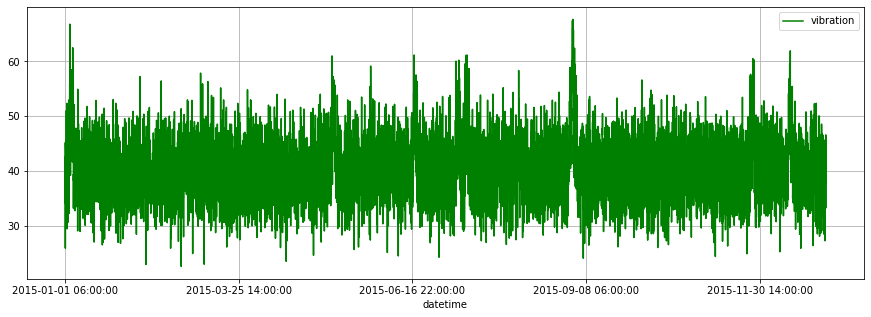

In [26]:
machine1_df.plot(x='datetime', y='vibration', figsize=(15,5), grid=True,color='green')    

## Matplotlib

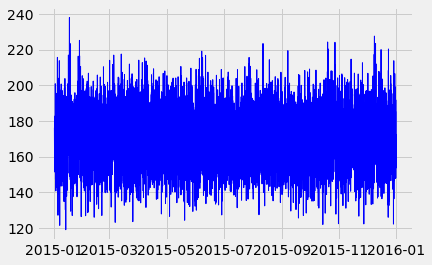

In [42]:
# make a line plot with matplotlib
plt.plot(machine1_df['datetime'], machine1_df['volt'], color='blue', linewidth=1) 


In [59]:
# show the style options 
#plt.style.available

In [54]:
# set the style fivethirtyeight 
plt.style.use('fivethirtyeight')

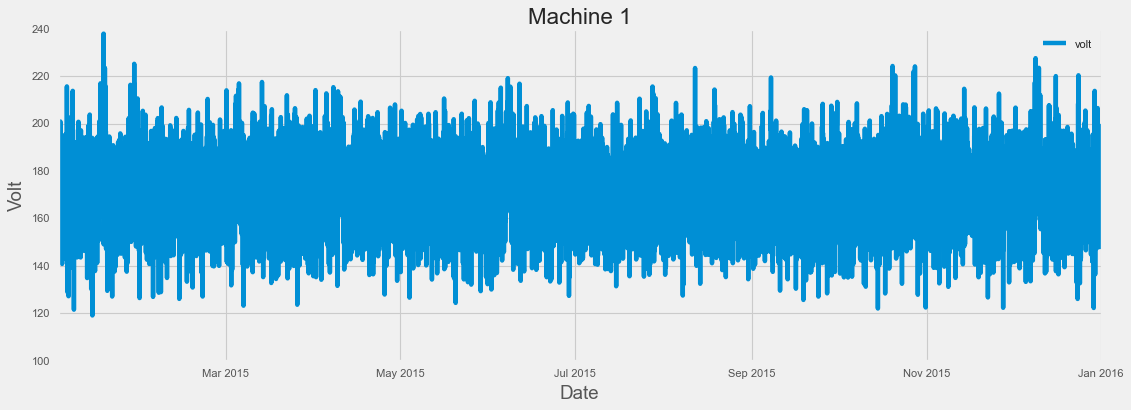

In [63]:
# create a plot in matplotlib using the object-oriented interface
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(machine1_df['datetime'], machine1_df['volt'],label='volt' )
ax.set_xlabel('Date')
ax.set_ylabel('Volt')
ax.set_title('Machine 1')
ax.legend()


In [84]:
machine1_df.describe()

,machineID,volt,rotate,pressure,vibration
count,8761.0,8761.000000,8761.000000,8761.000000,8761.000000
mean,1.0,170.833898,446.336502,100.668306,40.586309
std,0.0,15.314388,52.224261,10.860264,5.542143
min,1.0,119.059047,215.619476,58.733724,22.666865
25%,1.0,160.382124,412.348209,93.320867,36.847203
50%,1.0,170.618459,447.704679,100.319242,40.417442
75%,1.0,180.929341,481.358342,107.377475,44.004311
max,1.0,237.938518,636.364569,155.257527,67.633435


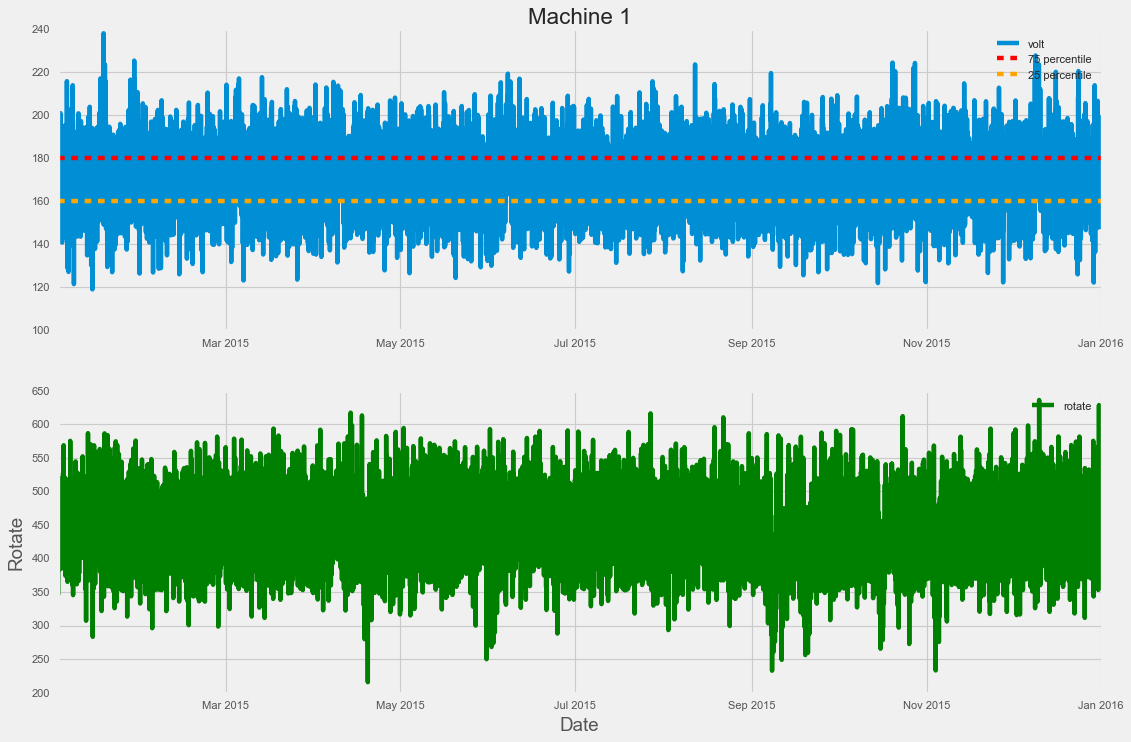

In [88]:
# create a subplot with 2 rows and 1 column 
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,10)) 
# plot the volt in the first row 
ax[0].plot(machine1_df['datetime'], machine1_df['volt'],label='volt' )
# add a horizontal line at the 180 value of the volt 
ax[0].axhline(y=180, color='red', linestyle='--',label='75 percentile')
# add a horizontal line at the 160  value of the volt
ax[0].axhline(y=160, color='orange', linestyle='--',label='25 percentile')
#ax[0].set_xlabel('Date')
#ax[0].set_ylabel('Volt')
ax[0].set_title('Machine 1')
ax[0].legend()
# plot the rotate in the second row
ax[1].plot(machine1_df['datetime'], machine1_df['rotate'],label='rotate',color='green' )
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Rotate')
#ax[1].set_title('Machine 1')
ax[1].legend() 



In [76]:
#  

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511
...,...,...,...,...,...,...
8756,2016-01-01 02:00:00,1,153.724780,450.254337,85.197443,43.698137
8757,2016-01-01 03:00:00,1,172.418099,375.701907,95.568265,42.111661
8758,2016-01-01 04:00:00,1,174.588145,460.505353,95.483913,33.293572
8759,2016-01-01 05:00:00,1,184.224228,438.823315,102.694358,46.609515


## Pandas 

In [92]:
# change telemetry_df to wide format 
telemetry_wide_df = telemetry_df.pivot(index='datetime', columns='machineID', values='volt')

telemetry_wide_df.head(2)

machineID,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
datetime,,,,,,,,,,,,,,,,,,,,,
2015-01-01 06:00:00,176.217853,176.558913,185.482043,169.710847,165.082899,136.878588,156.006391,159.379320,223.853296,158.421261,...,177.688355,159.446409,154.356894,175.639054,201.977168,155.273542,143.613163,153.300953,168.596133,161.587466
2015-01-01 07:00:00,162.879223,158.282044,179.818516,180.186857,192.783995,154.396864,216.913502,152.349153,153.106118,174.631951,...,173.426162,189.422834,158.261613,166.829717,171.602257,147.249491,169.258107,171.471504,153.667693,163.333175


<AxesSubplot:xlabel='datetime'>

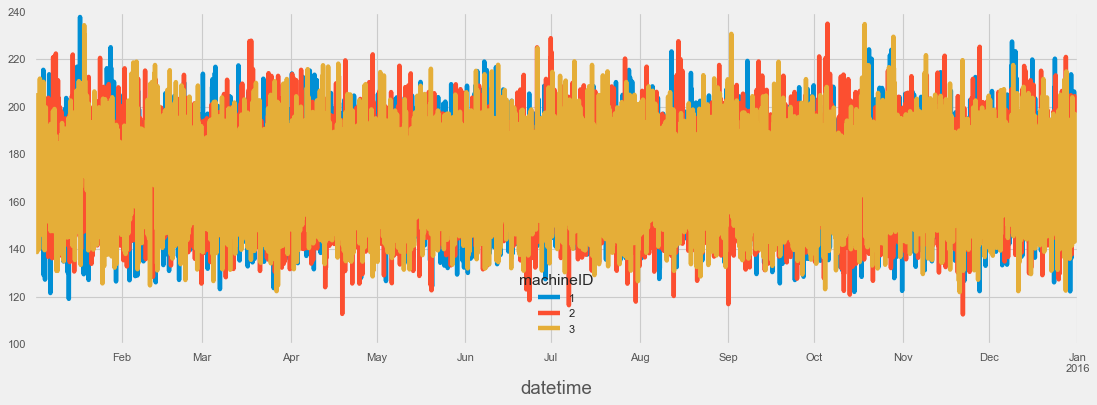

In [99]:
telemetry_wide_df[[1,2,3]].plot(figsize=(15,5), grid=True)

## Failures 

In [100]:
failures_df = pd.read_csv('data/PdM_failures.csv')

<AxesSubplot:xlabel='machineID'>

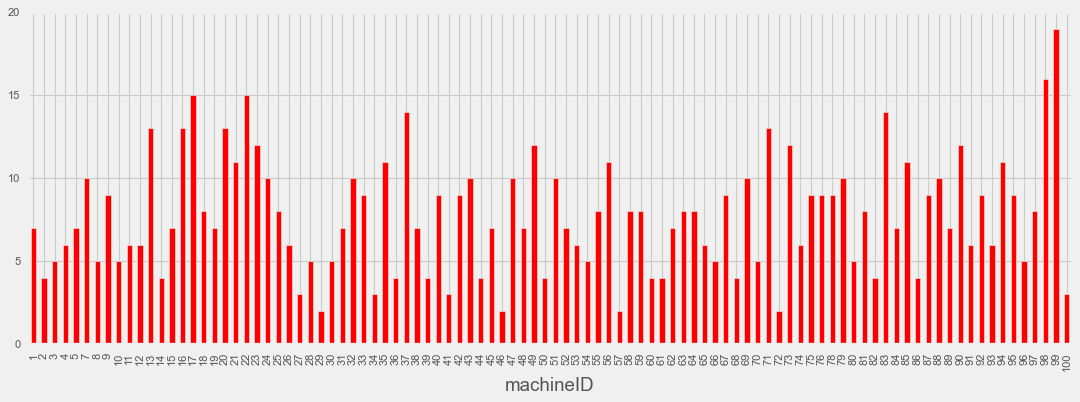

In [103]:
# make a bar plot with matplotlib for the failures grouped by machineID 
failures_df.groupby('machineID').count()['datetime'].plot(kind='bar', figsize=(15,5), grid=True, color='red')

In [108]:
telemetry_df[telemetry_df['machineID']==99].describe()

,machineID,volt,rotate,pressure,vibration
count,8761.0,8761.000000,8761.000000,8761.000000,8761.000000
mean,99.0,170.727884,444.766488,101.568852,40.524730
std,0.0,15.669937,53.516479,11.479984,5.583516
min,99.0,115.374750,202.991670,58.810059,22.860919
25%,99.0,160.157455,410.400051,93.892548,36.799832
50%,99.0,170.576318,445.880578,100.964955,40.350960
75%,99.0,181.146527,480.536715,108.267951,43.919249
max,99.0,235.001645,644.398055,154.095588,68.016550


In [109]:
telemetry_df[telemetry_df['machineID']==98].describe()

,machineID,volt,rotate,pressure,vibration
count,8761.0,8761.000000,8761.000000,8761.000000,8761.000000
mean,98.0,170.782478,446.066974,101.705498,40.499608
std,0.0,16.019581,53.196846,11.731294,5.430886
min,98.0,117.104639,173.378603,57.396385,20.264144
25%,98.0,159.981127,412.073376,93.919767,36.844996
50%,98.0,170.473981,447.329060,101.082056,40.309858
75%,98.0,181.071383,481.725581,108.432362,43.893451
max,98.0,236.510251,636.545899,162.828655,64.591908
